In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


LOG.propagate = False

Lab8 - Drift Stunt

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()
# Connect to the Artemis Device
ble.connect()

2024-05-07 09:47:42,984 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:42:30:78:92:49


2024-05-07 09:47:45,764 | INFO     |: Connected to c0:42:30:78:92:49


/Users/harrypeng/Desktop/ECE4160/lab1/ble_robot-1.1/ble_python/base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
timeData = []
tof1Data = []
yawData = []
distErrorData = []
yawErrorData = []
p_dist_data = []
i_dist_data = []
d_dist_data = []
tof1RawData = []
powerData = []
target_yaw_data = []
drift_status_data = []



In [4]:
def drift_stunt_notification_handler(uuid, char_bytearr):
    # global timeData, tof1Data, yawData, distErrorData, yawErrorData, leftPWM, rightPWM, p_dist_data, i_dist_data, d_dist_data, tof1RawData, powerData
    global timeData, tof1Data, yawData, distErrorData, yawErrorData, p_dist_data, i_dist_data, d_dist_data, tof1RawData, powerData, target_yaw_data, drift_status_data
    string = ble.bytearray_to_string(char_bytearr)
    parts = string.split("|")  
    print(parts)
    timeData.append(int(parts[0][2:]))
    yawData.append(float(parts[1][4:]))
    target_yaw_data.append(float(parts[2][7:]))
    yawErrorData.append(float(parts[3][7:]))
    drift_status_data.append(int(parts[4][7:]))
    tof1Data.append(float(parts[5][3:]))
    distErrorData.append(float(parts[6][5:]))
    tof1RawData.append(float(parts[7][6:]))
    p_dist_data.append(float(parts[8][2:]))
    i_dist_data.append(float(parts[9][2:]))
    d_dist_data.append(float(parts[10][2:]))
    powerData.append(float(parts[11][4:]))
    

In [5]:
ble.start_notify(ble.uuid["RX_STRING"], drift_stunt_notification_handler)

In [6]:
ble.send_command(CMD.PID_STATUS_INI, "1")

In [7]:
# position control
# ble.send_command(CMD.SET_PID_VALUES, "|10|0.05|4")
ble.send_command(CMD.SET_PID_VALUES, "|10|0.05|4")

# orientation control
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.08|5")    # performance good, but lasted so long during rotation 
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|5|0.08|7")    # perform is good but oscillation
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.08|10")    # perform is good 
ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.08|15")    # perform is best    # orient_power = 215
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.8|20")    # not bad

In [8]:
ble.send_command(CMD.DRIFT_STUNT, "")

In [17]:
ble.send_command(CMD.SEND_DRIFT_DEBUG_READINGS, "")

['T:92', 'Yaw:0.155', 'tarYaw:180.0', 'YawErr:180.155', 'driSta:0', 'D1:3649.0', 'DErr:3319.0', 'D1Raw:3649.0', 'p:33190.0', 'i:0.0', 'd:0.0', 'PWM:100.0']
['T:108', 'Yaw:0.155', 'tarYaw:180.0', 'YawErr:180.155', 'driSta:0', 'D1:3649.0', 'DErr:3319.0', 'D1Raw:3649.0', 'p:33190.0', 'i:-15.267', 'd:0.0', 'PWM:150.0']
['T:125', 'Yaw:0.155', 'tarYaw:180.0', 'YawErr:180.155', 'driSta:0', 'D1:3057.857', 'DErr:2727.857', 'D1Raw:3655.0', 'p:27278.576', 'i:-20.0', 'd:21894.160', 'PWM:150.0']
['T:141', 'Yaw:0.155', 'tarYaw:180.0', 'YawErr:180.155', 'driSta:0', 'D1:3379.815', 'DErr:3049.815', 'D1Raw:3655.0', 'p:30498.156', 'i:-20.0', 'd:-10302.656', 'PWM:150.0']
['T:146', 'Yaw:0.159', 'tarYaw:180.0', 'YawErr:180.159', 'driSta:0', 'D1:3551.372', 'DErr:3221.372', 'D1Raw:3655.0', 'p:32213.728', 'i:-20.0', 'd:-4866.868', 'PWM:150.0']
['T:157', 'Yaw:0.159', 'tarYaw:180.0', 'YawErr:180.159', 'driSta:0', 'D1:3663.347', 'DErr:3333.347', 'D1Raw:3655.0', 'p:33333.476', 'i:-20.0', 'd:-3067.804', 'PWM:150.0'

In [10]:
print(len(timeData))
print(len(tof1Data))
print(len(powerData))
print(len(yawData))
# print(len(p_dist_data))
# print(len(i_dist_data))

500
500
500
500


In [11]:
unused_index_arr = np.argwhere(np.array(timeData)==0)
if (len(unused_index_arr) != 0):
    unused_index = unused_index_arr[0][0]
else:
    unused_index = len(timeData)
print(unused_index)

500


In [12]:
# timeData[unused_index] = (timeData[unused_index-1] + timeData[unused_index+1])/2

In [13]:
# unused_index_arr = np.argwhere(np.array(timeData)==0)
# if (len(unused_index_arr) != 0):
#     unused_index = unused_index_arr[0][0]
# else:
#     unused_index = len(timeData)
# print(unused_index)

In [14]:
unused_index = 350

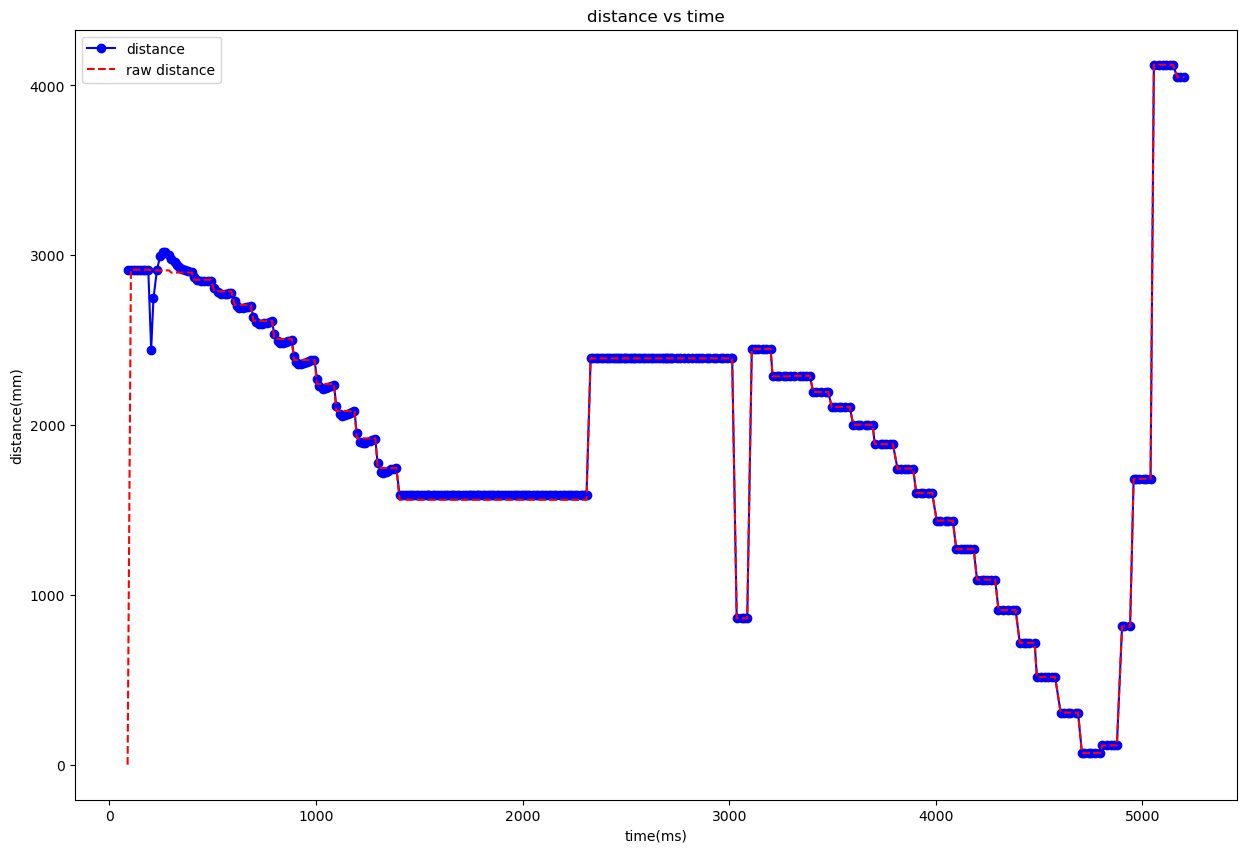

In [15]:
########## For KF/extrapolation compare plots ###########

# plot front distance vs time
plt.figure(figsize=(15, 10))
# dispose unused array parts

plt.plot(np.array(timeData)[:unused_index], np.array(tof1Data)[:unused_index], linestyle='-', marker='o',color='blue', label='distance')
plt.plot(np.array(timeData)[:unused_index], np.array(tof1RawData)[:unused_index], linestyle='--', color='red', label='raw distance')
plt.title("distance vs time")
plt.xlabel("time(ms)")
plt.ylabel("distance(mm)")
plt.legend()
plt.show()

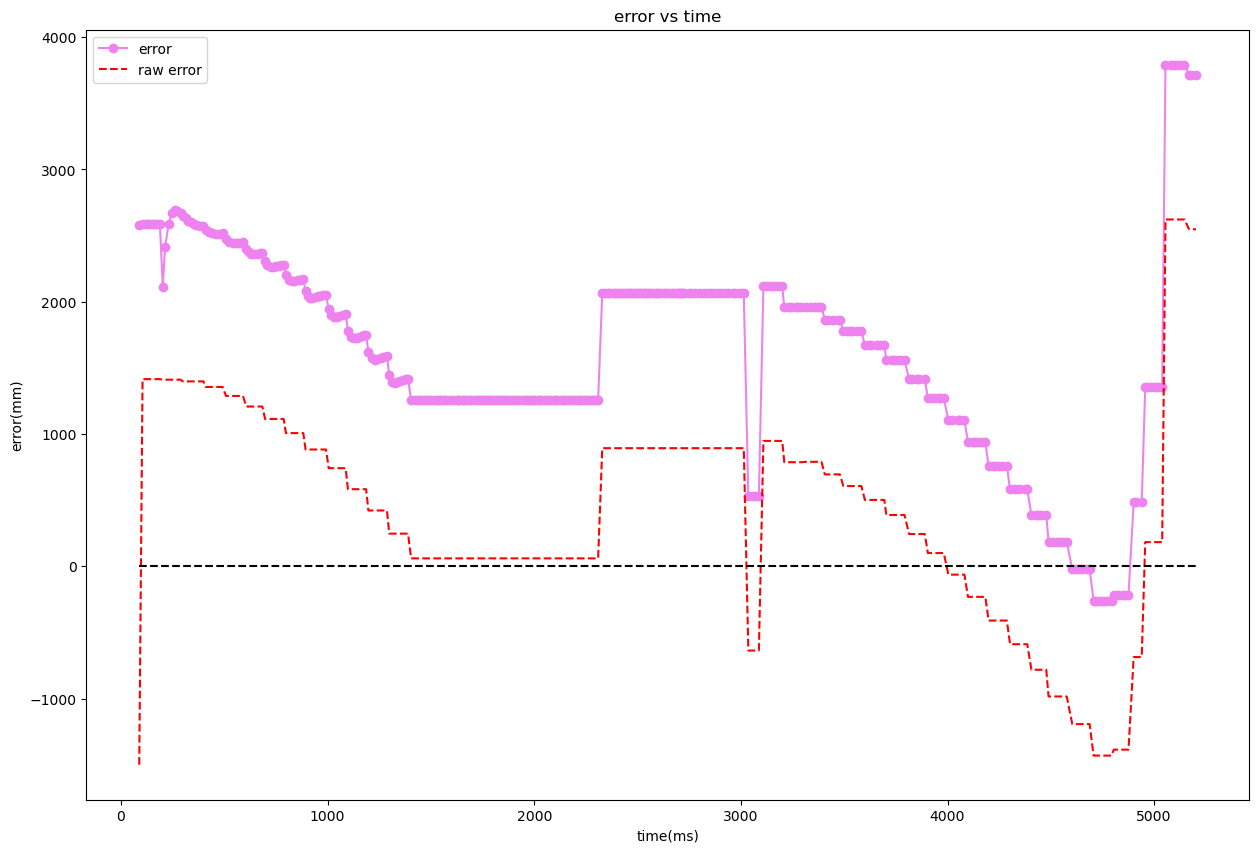

In [16]:
########## For KF/extrapolation Compare plots ########
# plot front error vs time
plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(distErrorData)[:unused_index], linestyle='-', marker='o', color='violet', label='error')
plt.plot(np.array(timeData)[:unused_index], np.array(tof1RawData)[:unused_index] - 1500, linestyle='--', color='red', label='raw error')
plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black')
plt.title("error vs time")
plt.xlabel("time(ms)")
plt.ylabel("error(mm)")
plt.legend()
plt.show()

In [17]:
unused_index = 350

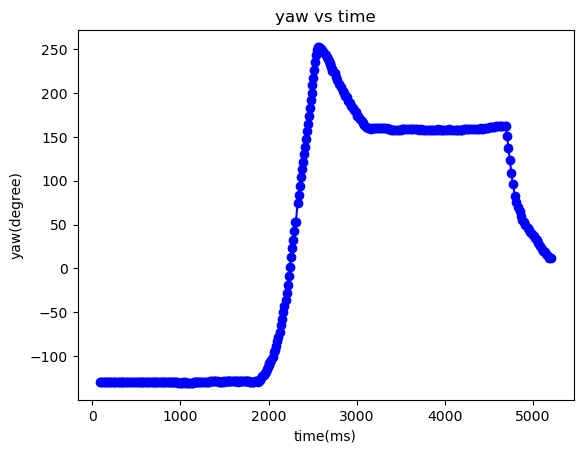

In [18]:
# plot Yaw vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(yawData)[:unused_index], linestyle='-', marker='o', color='blue', label='yaw')
# plt.plot(np.array(timeData), np.array(yawData), linestyle='-', marker='o', color='blue', label='yaw')
plt.title("yaw vs time")
plt.xlabel("time(ms)")
plt.ylabel("yaw(degree)")
plt.show()

In [19]:
# unused_index = 700

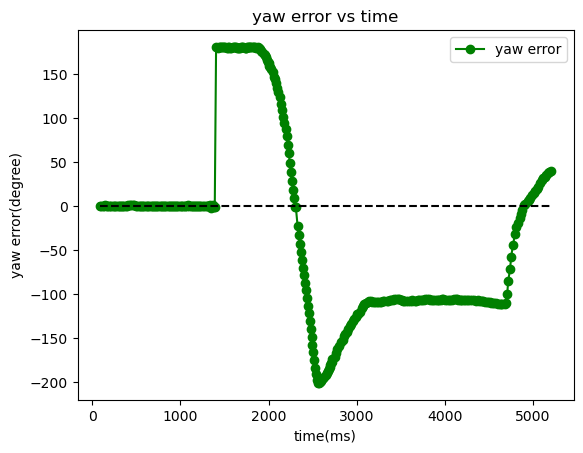

In [20]:
# plot yaw error vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(yawErrorData)[:unused_index], linestyle='-', marker='o', color='green', label='yaw error')
plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black')
# plt.plot(np.array(timeData), np.array(yawErrorData), linestyle='-', marker='o', color='green', label='yaw error')
# plt.plot(np.array(timeData), np.zeros((len(timeData))), linestyle='--', color='black')
plt.title("yaw error vs time")
plt.xlabel("time(ms)")
plt.ylabel("yaw error(degree)")
plt.legend()
plt.show()

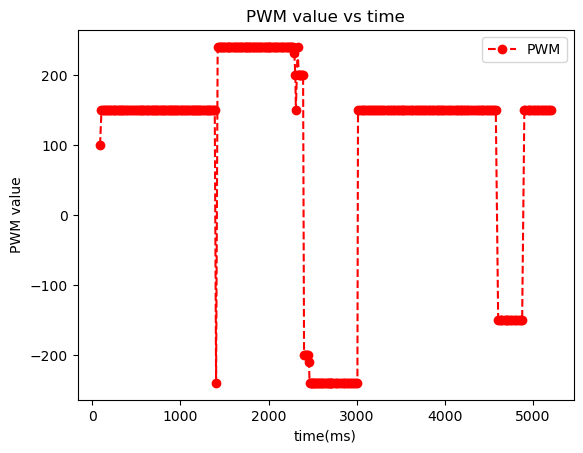

In [21]:
# plot PWM left & right value vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(powerData)[:unused_index], linestyle='--', marker='o', color='red', label='PWM')
plt.title("PWM value vs time")
plt.xlabel("time(ms)")
plt.ylabel("PWM value")
plt.legend()
plt.show()

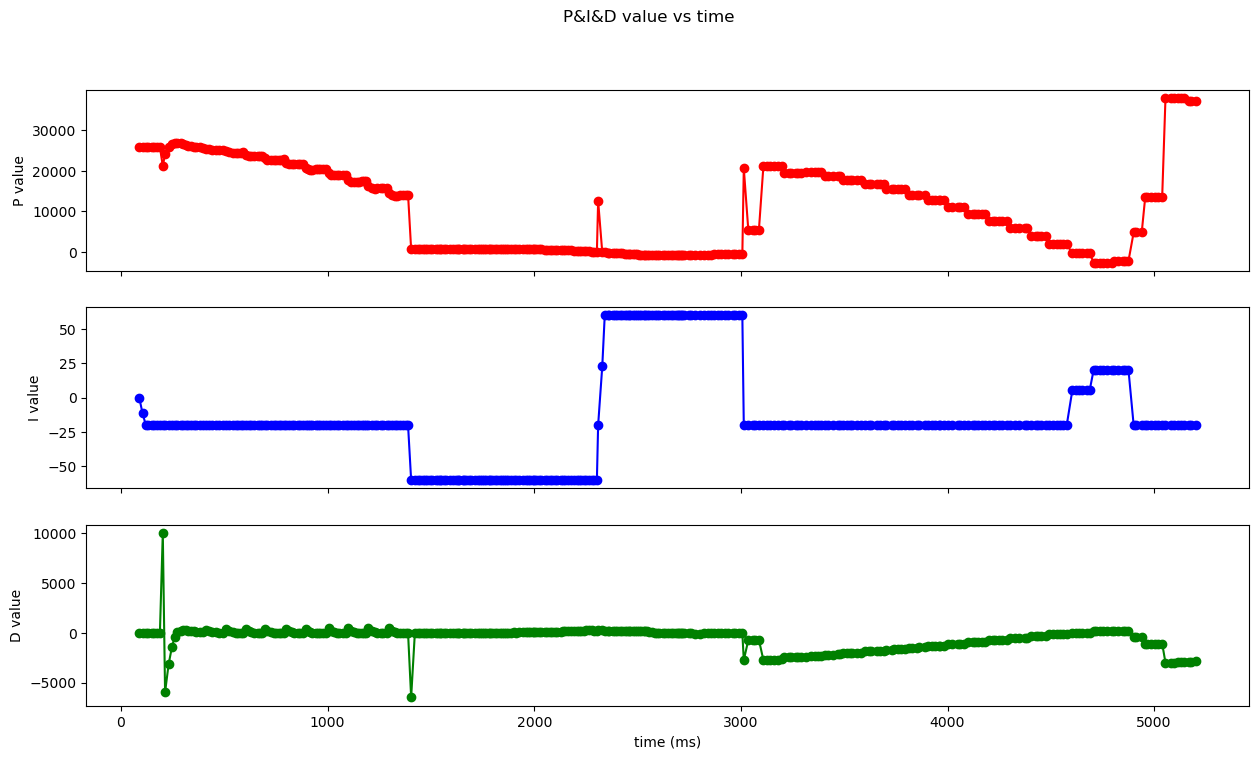

2024-05-05 18:17:08,230 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [22]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Plot P data
ax1.plot(np.array(timeData)[:unused_index], np.array(p_dist_data)[:unused_index], linestyle='-', marker='o', color='red', label='p_data')
# ax1.plot(np.array(timeData), np.array(p_data), linestyle='-', marker='o', color='red', label='p_data')
ax1.set_ylabel('P value')
ax3.set_xlabel('time (ms)')

# Plot I data
ax2.plot(np.array(timeData)[:unused_index], np.array(i_dist_data)[:unused_index], linestyle='-', marker='o', color='blue', label='i_data')
# ax2.plot(np.array(timeData), np.array(i_data), linestyle='-', marker='o', color='blue', label='i_data')
ax2.set_ylabel('I value')
ax3.set_xlabel('time (ms)')

# Plot D data
ax3.plot(np.array(timeData)[:unused_index], np.array(d_dist_data)[:unused_index], linestyle='-', marker='o', color='green', label='d_data')
# ax3.plot(np.array(timeData), np.array(d_data), linestyle='-', marker='o', color='green', label='d_data')
ax3.set_ylabel('D value')
ax3.set_xlabel('time (ms)')

# Set title and legend
plt.suptitle('P&I&D value vs time')
# plt.legend()

# Display the figure
plt.show()